In [85]:
import pandas as pd
import nltk
from nltk import PorterStemmer
import re
import string
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
df = pd.read_csv("News.csv")
df.head()

,Date,Source,Title,Headline,Label
0,8/23/21,engadget,PayPal brings cryptocurrency trading to the UK,PayPal bringing ability hold sell cryptocurren...,Crypto
1,9/15/21,the-verge,SIM swapper charged in cryptocurrency theft sc...,Diego student charged with extorting least peo...,Crypto
2,9/21/21,engadget,US Treasury sanctions cryptocurrency exchange ...,hints Treasury Department crackdown cryptocurr...,Crypto
3,9/21/21,None,Robinhood testing crypto wallet cryptocurrency...,Robinhood Markets testing crypto wallet crypto...,Crypto
4,9/24/21,the-verge,China s central bank bans cryptocurrency trans...,China central bank Friday said cryptocurrency ...,Crypto


In [19]:
###Create a dataframe for convectorizer
Label_List = []
Headlines_list = []

with open ("News.csv","r") as MY_FILE:
    next(MY_FILE)
    
    for next_row in MY_FILE:
        row_elements = next_row.split(",")
        print("Label is: \n",row_elements[4])
        print("Headline is :\n",row_elements[3])
        Label_List.append(row_elements[4])
        Headlines_list.append(row_elements[3])

Label is: 
 Crypto

Headline is :
 PayPal bringing ability hold sell cryptocurrencies across other side pond better part year after launched statement company said that based users would able hold sell Bitcoin
Label is: 
 Crypto

Headline is :
 Diego student charged with extorting least people cryptocurrency according Monday student used swapping seize control victims numbers accounts
Label is: 
 Crypto

Headline is :
 hints Treasury Department crackdown cryptocurrency exchanges were apparently accurate Treasury imposed sanctions SUEX crypto exchange allegedly facilitating ransomware attacks SUEX reportedly helped launder gotten
Label is: 
 Crypto

Headline is :
 Robinhood Markets testing crypto wallet cryptocurrency transfer features which would allow customers send receive digital currencies such bitcoin Bloomberg News reported Monday beta version iPhone showed
Label is: 
 Crypto

Headline is :
 China central bank Friday said cryptocurrency transactions country illegal banning transa

In [17]:
print(Label_List)

['Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Crypto\n', 'Cr

In [20]:
print(Headlines_list)

['PayPal bringing ability hold sell cryptocurrencies across other side pond better part year after launched statement company said that based users would able hold sell Bitcoin', 'Diego student charged with extorting least people cryptocurrency according Monday student used swapping seize control victims numbers accounts', 'hints Treasury Department crackdown cryptocurrency exchanges were apparently accurate Treasury imposed sanctions SUEX crypto exchange allegedly facilitating ransomware attacks SUEX reportedly helped launder gotten', 'Robinhood Markets testing crypto wallet cryptocurrency transfer features which would allow customers send receive digital currencies such bitcoin Bloomberg News reported Monday beta version iPhone showed', 'China central bank Friday said cryptocurrency transactions country illegal banning transactions said cryptocurrencies like bitcoin Ethereum legal tender circulated', 'United States imposed sanctions Tuesday cryptocurrency exchange SUEX ties ransomwar

In [3]:
###Stemmer
#import nltk
#from nltk import PorterStemmer
STEMMER=PorterStemmer()
print(STEMMER.stem("fishings"))

def MY_STEMMER(str_input):
    words = re.sub(r"[^A-Za-z\-]","",str_input).lower().split()
    words = [STEMMER.stem(w) for w in words]
    return words

fish


In [35]:
 Vect_STEM=CountVectorizer(input ='c',
                          analyzer = 'word',
                           stop_words = 'english',
                          #tokenizer = MY_STEMMER,
                           max_features=100,
                          lowercase = True)

In [36]:
X1 = Vect_STEM.fit_transform(Headlines_list)
ColNames1 = Vect_STEM.get_feature_names()
print("vocab is :",ColNames1,"\n\n")   


vocab is : ['according', 'ahead', 'allow', 'announced', 'assets', 'bank', 'better', 'billion', 'binance', 'bitcoin', 'blank', 'business', 'canada', 'central', 'china', 'coin', 'coinbase', 'commission', 'companies', 'company', 'country', 'crack', 'crypto', 'cryptocurrencies', 'cryptocurrency', 'currencies', 'customers', 'data', 'demand', 'department', 'digital', 'early', 'earnings', 'economic', 'emphasizes', 'estimate', 'estimates', 'exchange', 'exchanges', 'federal', 'financial', 'focus', 'friday', 'global', 'great', 'growth', 'high', 'href', 'https', 'index', 'investors', 'largest', 'legal', 'lower', 'main', 'major', 'market', 'markets', 'million', 'monday', 'neverthe', 'offering', 'option', 'payments', 'paypal', 'platform', 'possible', 'proven', 'rank', 'reported', 'retail', 'reuters', 'revisions', 'said', 'salvador', 'securities', 'sell', 'services', 'shares', 'slowing', 'stock', 'stocks', 'street', 'target', 'tender', 'thursday', 'time', 'trade', 'trading', 'treasury', 'tuesday', '

In [151]:
builderS = pd.DataFrame(X1.toarray(),columns = ColNames1)
builderS.insert(loc = 0,column = 'Label',value = Label_List)
builderS.head()


,Label,according,ahead,allow,announced,assets,bank,better,billion,binance,...,tuesday,value,virtual,wall,wallet,wednesday,week,world,year,zacks
0,Crypto\n,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Crypto\n,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Crypto\n,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Crypto\n,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Crypto\n,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
builderS.to_csv('vectorized_News.csv', index=False)

In [70]:
###Splting into training and testing datasets
from sklearn.model_selection import train_test_split
import random as rd

rd.seed(1234)
df1_train,df1_test = train_test_split(builderS,test_size =0.3)
len(df1_test_nl)

60

In [69]:
len(df1_train_nl)

140

In [45]:
###Process labels
##Test set

#Save labels
TestLabels1 = df1_test["Label"]

#Remove labels
df1_test_nl = df1_test.drop(["Label"],axis=1)

print(TestLabels)
print(df1_test_nl)

195     Stock\n
9      Crypto\n
17     Crypto\n
166     Stock\n
38     Crypto\n
93     Crypto\n
183     Stock\n
110     Stock\n
36     Crypto\n
132     Stock\n
121     Stock\n
161     Stock\n
88     Crypto\n
57     Crypto\n
28     Crypto\n
149     Stock\n
178     Stock\n
14     Crypto\n
45     Crypto\n
136     Stock\n
7      Crypto\n
10     Crypto\n
126     Stock\n
113     Stock\n
107     Stock\n
189     Stock\n
58     Crypto\n
131     Stock\n
77     Crypto\n
82     Crypto\n
83     Crypto\n
159     Stock\n
130     Stock\n
155     Stock\n
147     Stock\n
54     Crypto\n
33     Crypto\n
104     Stock\n
134     Stock\n
133     Stock\n
164     Stock\n
168     Stock\n
158     Stock\n
53     Crypto\n
68     Crypto\n
142     Stock\n
16     Crypto\n
111     Stock\n
71     Crypto\n
137     Stock\n
81     Crypto\n
86     Crypto\n
76     Crypto\n
167     Stock\n
129     Stock\n
188     Stock\n
144     Stock\n
122     Stock\n
176     Stock\n
63     Crypto\n
Name: Label, dtype: object
     accordin

In [46]:
##Training dataset
#Save labels
TrainLabels1 = df1_train["Label"]

#Remove labels
df1_train_nl = df1_train.drop(["Label"],axis=1)

print(df1_train_nl)

     according  ahead  allow  announced  assets  bank  better  billion  \
173          0      0      0          0       0     0       1        0   
193          0      1      0          0       0     1       0        0   
123          0      0      0          0       0     0       0        0   
41           0      0      0          0       0     0       0        0   
39           0      0      0          1       0     0       0        0   
..         ...    ...    ...        ...     ...   ...     ...      ...   
64           0      0      0          0       0     0       0        0   
199          0      1      0          0       0     0       0        0   
42           0      0      0          0       0     1       0        0   
172          0      0      0          0       0     0       0        0   
24           0      0      0          0       1     0       0        0   

     binance  bitcoin  ...  tuesday  value  virtual  wall  wallet  wednesday  \
173        0        0  ...     

In [60]:
###Naive Bayes
from sklearn.naive_bayes import MultinomialNB

#Create the modeler
MyNB1= MultinomialNB()
NB1 = MyNB1.fit(df1_train_nl,TrainLabels1)
Pred1 = MyNB1.predict(df1_test_nl)
print(np.round(MyNB1.predict_proba(df1_test_nl),2))

[[0.   0.   1.  ]
 [0.94 0.03 0.02]
 [0.98 0.02 0.  ]
 [0.   0.   1.  ]
 [1.   0.   0.  ]
 [0.98 0.   0.02]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [1.   0.   0.  ]
 [0.02 0.01 0.97]
 [0.   0.   1.  ]
 [0.01 0.   0.98]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.   0.   1.  ]
 [0.   0.   0.99]
 [0.99 0.   0.01]
 [1.   0.   0.  ]
 [0.   0.   1.  ]
 [1.   0.   0.  ]
 [0.97 0.02 0.01]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.75 0.03 0.22]
 [0.   0.   1.  ]
 [0.84 0.01 0.15]
 [0.   0.   1.  ]
 [0.99 0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.02 0.   0.98]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.01 0.   0.99]
 [0.97 0.   0.03]
 [0.94 0.03 0.03]
 [0.03 0.   0.96]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.71 0.01 0.28]
 [0.07 0.01 0.93]
 [0.01 0.   0.99]
 [0.97 0.   0.03]
 [0.96 0.   0.03]
 [0.06 0.01 0.93]
 [1.   0.   0.  ]
 [0.53 0.01 0.46]
 [1.   0.   0.  ]
 [0.   0.   1.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.0

[[26  0]
 [ 3 31]]


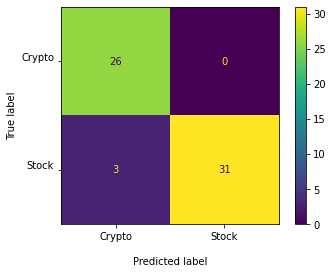

In [71]:
#Confusion Matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
cnf_matrix1 = confusion_matrix(TestLabels1, Pred1)
print(cnf_matrix1)
plot_confusion_matrix(MyNB1,df1_test_nl,TestLabels1)
plt.show()

In [98]:
print(indices)

<function indices at 0x7fc6b04f6ca0>


In [80]:
#Feature Importance
from sklearn.feature_extraction import text
from sklearn.naive_bayes import MultinomialNB
from sklearn.inspection import permutation_importance
featureimp1 = permutation_importance(MyNB1,df1_test_nl,TestLabels1)
importances1 = featureimp1.importances_mean
std = featureimp1.importances_std
indices = np.argsort(importances1)[::-1]

print("Feature Ranking:")
for f in range(df1_test_nl.shape[1]):
    print("%d. %s (%f)"% (f + 1, ColNames1[indices[f]],importances1[indices[f]]))


Feature Ranking:
1. stock (0.103333)
2. cryptocurrency (0.040000)
3. stocks (0.016667)
4. zacks (0.013333)
5. index (0.006667)
6. economic (0.003333)
7. wallet (0.000000)
8. main (0.000000)
9. currencies (0.000000)
10. customers (0.000000)
11. data (0.000000)
12. demand (0.000000)
13. department (0.000000)
14. digital (0.000000)
15. exchange (0.000000)
16. exchanges (0.000000)
17. financial (0.000000)
18. friday (0.000000)
19. global (0.000000)
20. wall (0.000000)
21. https (0.000000)
22. investors (0.000000)
23. largest (0.000000)
24. legal (0.000000)
25. world (0.000000)
26. cryptocurrencies (0.000000)
27. crypto (0.000000)
28. blank (0.000000)
29. ahead (0.000000)
30. allow (0.000000)
31. assets (0.000000)
32. bank (0.000000)
33. billion (0.000000)
34. binance (0.000000)
35. bitcoin (0.000000)
36. business (0.000000)
37. crack (0.000000)
38. canada (0.000000)
39. central (0.000000)
40. china (0.000000)
41. coin (0.000000)
42. coinbase (0.000000)
43. companies (0.000000)
44. country 

In [103]:
#plt.figure(figsize(10,7))
#plt.title("Feature Importances")
#plt.bar(range(df1_test_nl.shape[1]),importances1[indices],color = "r",yerr=std[indices], align = "center")
#plt.xticks(range(df1_test_nl.shape[1]),[ColNames1[indices[i]]for i in range(6)])
#plt.xlim([-1,df1_test_nl.shape[1]])
#plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [155]:
###SVM
from sklearn.svm import LinearSVC
SVM_Model1=LinearSVC(C=1)
SVM_Model1.fit(df1_train_nl,TrainLabels1)
SVM_matrix1 = confusion_matrix(TestLabels1, SVM_Model1.predict(df1_test_nl))
print(SVM_matrix1)

plot_confusion_matrix(SVM_Model1,df1_test_nl,TestLabels1)
plt.show()

[[23  3]
 [ 1 33]]


In [152]:
##Other Kernels
#RBF
from sklearn.svm import LinearSVC
from sklearn import svm
SVM_Model2 = svm.SVC(C=0.51,kernel = 'rbf',verbose = True, gamma = "auto")
SVM_Model2.fit(df1_train_nl,TrainLabels1)
SVM_matrix2 = confusion_matrix(TestLabels1, SVM_Model2.predict(df1_test_nl))
print(SVM_matrix2)

plot_confusion_matrix(SVM_Model2,df1_test_nl,TestLabels1)
plt.show()

[LibSVM][[26  0]
 [ 3 31]]


In [156]:
#Poly
SVM_Model3 = svm.SVC(C=0.001,kernel = 'poly',degree=3, verbose = True, gamma = "auto")
SVM_Model3.fit(df1_train_nl,TrainLabels1)
SVM_matrix3 = confusion_matrix(TestLabels1, SVM_Model3.predict(df1_test_nl))
print(SVM_matrix3)

plot_confusion_matrix(SVM_Model3,df1_test_nl,TestLabels1)
plt.show()

[LibSVM][[26  0]
 [34  0]]


In [146]:
import matplotlib.pyplot as plt
def plot_coefficients(MODEL=SVM_Model1,COLNAMES = df1_train_nl.columns, top_features=10):
    coef = MODEL.coef_.ravel()
    top_positive_coefficients = np.argsort(coef,axis=0)[-top_features:]
    print(top_positive_coefficients)
    top_negetive_coefficients = np.argsort(coef,axis=0)[:top_features]
    print(top_negetive_coefficients)
    top_coefficients = np.hstack([top_negetive_coefficients,top_positive_coefficients])
    
    plt.figure(figsize(15,5))
    colors = ["red" if c < 0 else "blue" for c in coef[top_coefficients]]
    plt.bar(x = np.arange(2*top_features) , height=coef[top_coefficients], width=.5, color=colors)
    feature_names = np.array(COLNAMES)
    plt.xticks(np.arange(0,(2*top_features)),feature_names[top_coefficients],rotation = 60,ha ="right")
    plt.show()

plot_coefficients()

[263 240 227 278 281 283 285  24  30 280]
[ 80 224 230  83  85  81  78 287  40  22]


IndexError: index 224 is out of bounds for axis 0 with size 100